# Singularities in colliding gravitational plane-wave spacetimes by Konkowski & Helliwell
#####  Geoff Cope
#####  University of Utah
#####  December 28, 2021  

Here we work with the metric from equation 2f.  This metric is given again as equation 7, but with specific functions specified for U,V, and M.  We will revisit this later.  IMPORTANT:  SEE METRIC 1D AND FIND THIS IN MATZNER AND TIPLER

https://iopscience.iop.org/article/10.1088/0264-9381/6/12/012/meta

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
u,v,x,dy,du,dv,dx,dy = symbols( 'u v x y du dv dx dy' , positive = True, real = True  ) 

In [4]:
M = Function('M')(u,v)
M

In [5]:
U = Function('U')(u,v)
U

In [6]:
V = Function('V')(u,v)
V

In [7]:
variables = Matrix( [u,v,x,y] )
variables

⎡u⎤
⎢ ⎥
⎢v⎥
⎢ ⎥
⎢x⎥
⎢ ⎥
⎣y⎦

In [8]:
differentials = Matrix( [du,dv,dx,dy])
differentials 

⎡du⎤
⎢  ⎥
⎢dv⎥
⎢  ⎥
⎢dx⎥
⎢  ⎥
⎣dy⎦

In [10]:
lineElement = expand(-2*exp(-M)*du*dv - exp(-U) * ( exp(V)*dx**2 + exp(-V)*dy**2 ) )
lineElement

In [11]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡              -M(u, v)                                           ⎤
⎢    0       -ℯ                   0                    0          ⎥
⎢                                                                 ⎥
⎢  -M(u, v)                                                       ⎥
⎢-ℯ              0                0                    0          ⎥
⎢                                                                 ⎥
⎢                          -U(u, v)  V(u, v)                      ⎥
⎢    0           0       -ℯ        ⋅ℯ                  0          ⎥
⎢                                                                 ⎥
⎢                                               -U(u, v)  -V(u, v)⎥
⎣    0           0                0           -ℯ        ⋅ℯ        ⎦

In [12]:
import sympy

In [13]:
m = sympy.Array(g)
m

⎡              -M(u, v)                                           ⎤
⎢    0       -ℯ                   0                    0          ⎥
⎢                                                                 ⎥
⎢  -M(u, v)                                                       ⎥
⎢-ℯ              0                0                    0          ⎥
⎢                                                                 ⎥
⎢                          -U(u, v)  V(u, v)                      ⎥
⎢    0           0       -ℯ        ⋅ℯ                  0          ⎥
⎢                                                                 ⎥
⎢                                               -U(u, v)  -V(u, v)⎥
⎣    0           0                0           -ℯ        ⋅ℯ        ⎦

In [14]:
from einsteinpy.symbolic import *

In [15]:
syms = sympy.symbols("u v x y"  , positive = True, real = True)
u,v,x,y = syms

In [16]:
metric = MetricTensor(m,syms)

In [17]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡                                                                                           
⎢⎡ ∂                                                                                        
⎢⎢-──(M(u, v))  0                             0                                             
⎢⎢ ∂u                                                                                       
⎢⎢                                                                                          
⎢⎢     0        0                             0                                             
⎢⎢                                                                                          
⎢⎢                 ⎛∂             ∂          ⎞  M(u, v) - U(u, v) + V(u, v)                 
⎢⎢                 ⎜──(U(u, v)) - ──(V(u, v))⎟⋅ℯ                                            
⎢⎢                 ⎝∂v            ∂v         ⎠                                              
⎢⎢     0        0  ───────────────────────────────────────────────────

In [18]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡                                             2                               2             
⎢                                ⎛∂          ⎞                   ⎛∂          ⎞            ∂ 
⎢                                ⎜──(U(u, v))⎟      2            ⎜──(V(u, v))⎟            ──
⎢      ∂           ∂             ⎝∂u         ⎠     ∂             ⎝∂u         ⎠            ∂u
⎢      ──(M(u, v))⋅──(U(u, v)) - ────────────── + ───(U(u, v)) - ──────────────         - ──
⎢      ∂u          ∂u                  2            2                  2                    
⎢                                                 ∂u                                        
⎢                                                                                           
⎢                                                                                           
⎢  ∂           ∂             ∂           ∂                                                  
⎢  ──(U(u, v))⋅──(U(u, v))   ──(V(u, v))⋅──(V(u, v))      2           

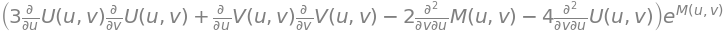

In [19]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [20]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                                       2                               2                   
⎢                          ⎛∂          ⎞                   ⎛∂          ⎞                    
⎢                          ⎜──(U(u, v))⎟      2            ⎜──(V(u, v))⎟                    
⎢∂           ∂             ⎝∂u         ⎠     ∂             ⎝∂u         ⎠                    
⎢──(M(u, v))⋅──(U(u, v)) - ────────────── + ───(U(u, v)) - ──────────────                1.0
⎢∂u          ∂u                  2            2                  2                          
⎢                                           ∂u                                              
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                               2                     

In [21]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [22]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

In [23]:
ricciSimplified = simplify(Ric.tensor())
ricciSimplified

⎡                                             2                               2             
⎢                                ⎛∂          ⎞                   ⎛∂          ⎞            ∂ 
⎢                                ⎜──(U(u, v))⎟      2            ⎜──(V(u, v))⎟            ──
⎢      ∂           ∂             ⎝∂u         ⎠     ∂             ⎝∂u         ⎠            ∂u
⎢      ──(M(u, v))⋅──(U(u, v)) - ────────────── + ───(U(u, v)) - ──────────────         - ──
⎢      ∂u          ∂u                  2            2                  2                    
⎢                                                 ∂u                                        
⎢                                                                                           
⎢                                                                                           
⎢  ∂           ∂             ∂           ∂                                                  
⎢  ──(U(u, v))⋅──(U(u, v))   ──(V(u, v))⋅──(V(u, v))      2           

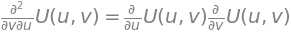

In [58]:
fieldEquation1 = Eq(diff(U,u,v),solve( einst.tensor()[1,0] , diff(U,u,v) )[0])
fieldEquation1

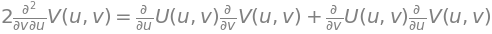

In [59]:
fieldEquation2 = Eq(2*diff(V,u,v),2*solve( ( einst.tensor()[3,3].args[0].args[0] - einst.tensor()[2,2].args[0].args[0] ), diff(V,u,v) )[0])
fieldEquation2

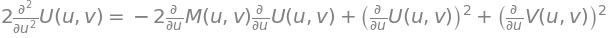

In [60]:
fieldEquation3 = Eq(2*diff(U,u,u),2*solve( einst.tensor()[0,0], diff(U,u,u) )[0])
fieldEquation3

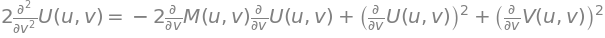

In [61]:
fieldEquation4 = Eq(2*diff(U,v,v),2*solve( einst.tensor()[1,1], diff(U,v,v) )[0]) 
fieldEquation4

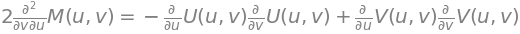

In [67]:
fieldEquation5 = Eq(2*diff(M,u,v),2*solve(( einst.tensor()[2,2].args[1].args[1] + einst.tensor()[3,3].args[1].args[1] ) , diff(M,u,v) )[0] ).subs(fieldEquation1.args[0],fieldEquation1.args[1])
fieldEquation5

In [69]:
vacuumFieldEquations = Matrix([fieldEquation1,fieldEquation2,fieldEquation3,fieldEquation4,fieldEquation5])
vacuumFieldEquations

⎡                      2                                                       ⎤
⎢                     ∂              ∂           ∂                             ⎥
⎢                   ─────(U(u, v)) = ──(U(u, v))⋅──(U(u, v))                   ⎥
⎢                   ∂v ∂u            ∂u          ∂v                            ⎥
⎢                                                                              ⎥
⎢          2                                                                   ⎥
⎢         ∂              ∂           ∂             ∂           ∂               ⎥
⎢     2⋅─────(V(u, v)) = ──(U(u, v))⋅──(V(u, v)) + ──(U(u, v))⋅──(V(u, v))     ⎥
⎢       ∂v ∂u            ∂u          ∂v            ∂v          ∂u              ⎥
⎢                                                                              ⎥
⎢    2                                                       2                2⎥
⎢   ∂                 ∂           ∂             ⎛∂          ⎞    ⎛∂          ⎞ ⎥
⎢2⋅───(U(u, v)) = - 2⋅──(M(u